In [1]:

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('US_Accidents_March23.csv',sep=",",encoding='utf-8')

In [2]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:

df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Year'] = df['Start_Time'].dt.year  
df = df[df['Year'] != 2023]

In [4]:

df.isnull().sum().sort_values(ascending=False)

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2192380
Wind_Chill(F)            1990741
Wind_Speed(mph)           563451
Visibility(mi)            170230
Wind_Direction            167423
Humidity(%)               167397
Weather_Condition         166830
Temperature(F)            157679
Pressure(in)              135013
Weather_Timestamp         114894
Airport_Code               21759
Sunrise_Sunset             21571
Civil_Twilight             21571
Nautical_Twilight          21571
Astronomical_Twilight      21571
Street                     10099
Timezone                    7579
Zipcode                     1856
City                         251
Description                    5
Railway                        0
No_Exit                        0
Station                        0
Roundabout                     0
Give_Way                       0
Stop                           0
Traffic_Calming                0
Traffic_Signal                 0
Turning_Lo

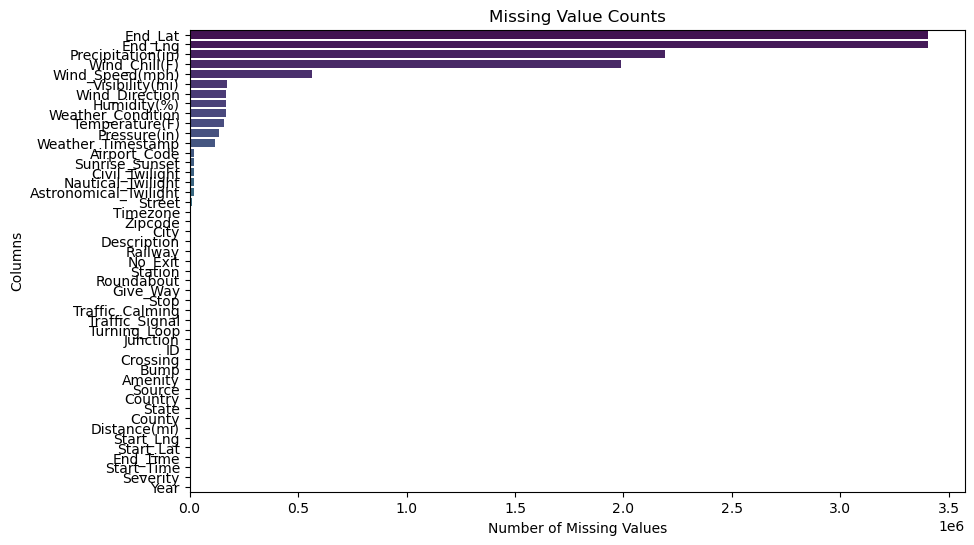

In [5]:
# Visualise missing values using Seaborn 
missing_values = df.isnull().sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.values, y=missing_values.index, palette="viridis")
plt.title('Missing Value Counts')
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.show()

In [6]:
# Drop the rows where at least one element is missing (if necessary)
df = df.dropna() 
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year
3402762,A-3412645,Source1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,...,False,False,False,False,False,Night,Night,Night,Night,2016
3402767,A-3412650,Source1,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,...,False,False,False,False,False,Day,Day,Day,Day,2016
3402771,A-3412654,Source1,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,41.367860,-81.821740,0.521,...,False,False,False,False,False,Day,Day,Day,Day,2016
3402773,A-3412656,Source1,2,2016-02-08 15:16:43,2016-02-08 21:16:43,40.109310,-82.968490,40.110780,-82.984000,0.826,...,False,False,False,False,False,Day,Day,Day,Day,2016
3402774,A-3412657,Source1,2,2016-02-08 15:43:50,2016-02-08 21:43:50,39.192880,-84.477230,39.196150,-84.473350,0.307,...,False,False,False,False,False,Day,Day,Day,Day,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,...,False,False,False,False,False,Day,Day,Day,Day,2019
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,...,False,False,False,False,False,Day,Day,Day,Day,2019
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,...,False,False,False,False,False,Day,Day,Day,Day,2019
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,...,False,False,False,False,False,Day,Day,Day,Day,2019


In [7]:
# printout all states
df['State'].unique()

array(['OH', 'IN', 'KY', 'WV', 'PA', 'MI', 'CA', 'MN', 'LA', 'NE', 'MO',
       'IA', 'ND', 'CO', 'KS', 'TX', 'WI', 'OK', 'WY', 'SD', 'MS', 'AR',
       'IL', 'MA', 'RI', 'ME', 'NY', 'TN', 'FL', 'MD', 'NC', 'GA', 'VA',
       'CT', 'NJ', 'DE', 'NH', 'SC', 'VT', 'DC', 'AL', 'MT', 'ID', 'UT',
       'AZ', 'NM', 'NV', 'WA', 'OR'], dtype=object)

Coastal_or_Inland_Regions
Coastal_Regions    2167616
Inland_Regions     1090481
Others               67365
Name: Coastal_or_Inland_Regions, dtype: int64


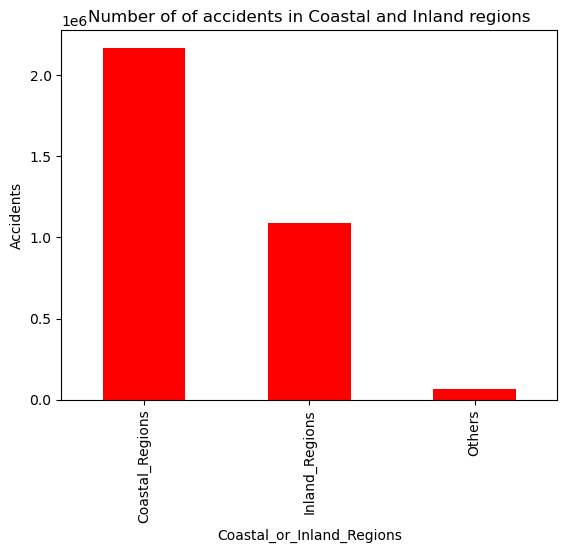

In [8]:

Coastal_Regions = ['CA', 'FL', 'GA', 'SC', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'MD', 'VA', 'DC', 'DE', 'AL', 'NC']
Inland_Regions = ['OH', 'WV', 'NE', 'IA', 'IL', 'MO', 'WI', 'IN', 'MI', 'PA', 'KY', 'TX', 'WA', 'OR', 'TN', 'LA', 'MN', 'CO', 'OK', 'NV', 'UT', 'KS', 'NM', 'AR', 'MS', 'ME', 'VT', 'WY', 'ID', 'ND', 'MT', 'SD']


def classify(state):
    if state in Coastal_Regions:
        return 'Coastal_Regions'
    elif state in Inland_Regions:
        return 'Inland_Regions'
    else:
        return 'Others'

df['Coastal_or_Inland_Regions'] = df['State'].apply(classify)


df_Coastal_or_Inland_Regions = df.groupby(['Coastal_or_Inland_Regions'])['Coastal_or_Inland_Regions'].count()
print(df_Coastal_or_Inland_Regions)

#visualise how many accidents in 'Coastal_or_Inland_Regions'
df_Coastal_or_Inland_Regions.plot(kind='bar')
ax = df_Coastal_or_Inland_Regions.plot(kind='bar',color='red')
plt.ylabel('Accidents')
plt.title("Number of of accidents in Coastal and Inland regions")
plt.show()

# Coastal regions have a significantly higher number of total traffic accidents compared to inland regions, according to Coastal and Inland classification. 

# Coastal regions have twice the number of traffic accidents compared to inland regions.

Location
East      1749483
Middle     425517
West      1150462
Name: Location, dtype: int64


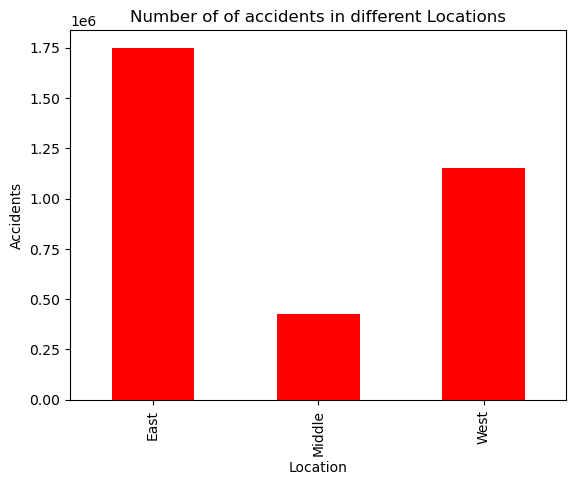

In [9]:
# printout all states
df['State'].unique()
# define west,middle and east states
west_states = ['CA', 'WA', 'OR', 'NV', 'ID', 'MT', 'WY', 'UT', 'CO', 'AZ', 'NM']
middle_states = ['ND', 'SD', 'NE', 'KS', 'OK', 'TX', 'MN', 'IA', 'MO', 'AR', 'LA']
east_states = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA', 'DE', 'MD', 'DC', 'WV', 'VA', 'KY', 'TN', 'NC', 'SC', 'GA', 'FL', 'AL', 'MS', 'OH', 'IN', 'MI', 'WI', 'IL']

# Function to classify states
def classify_state(state):
    if state in west_states:
        return 'West'
    elif state in middle_states:
        return 'Middle'
    elif state in east_states:
        return 'East'
    else:
        return 'Unknown'
# Create 'location' column
df['Location'] = df['State'].apply(classify_state)

# how many accidents in locations
df_location = df.groupby(['Location'])['Location'].count()
print(df_location)

#visualise how many accidents in locations
df_location.plot(kind='bar')
ax = df_location.plot(kind='bar',color='red')
plt.ylabel('Accidents')
plt.title("Number of of accidents in different Locations")
plt.show()

In [10]:
# how many accidents in states
df3 = df.groupby(['State'])['State'].count().sort_values(ascending=False)



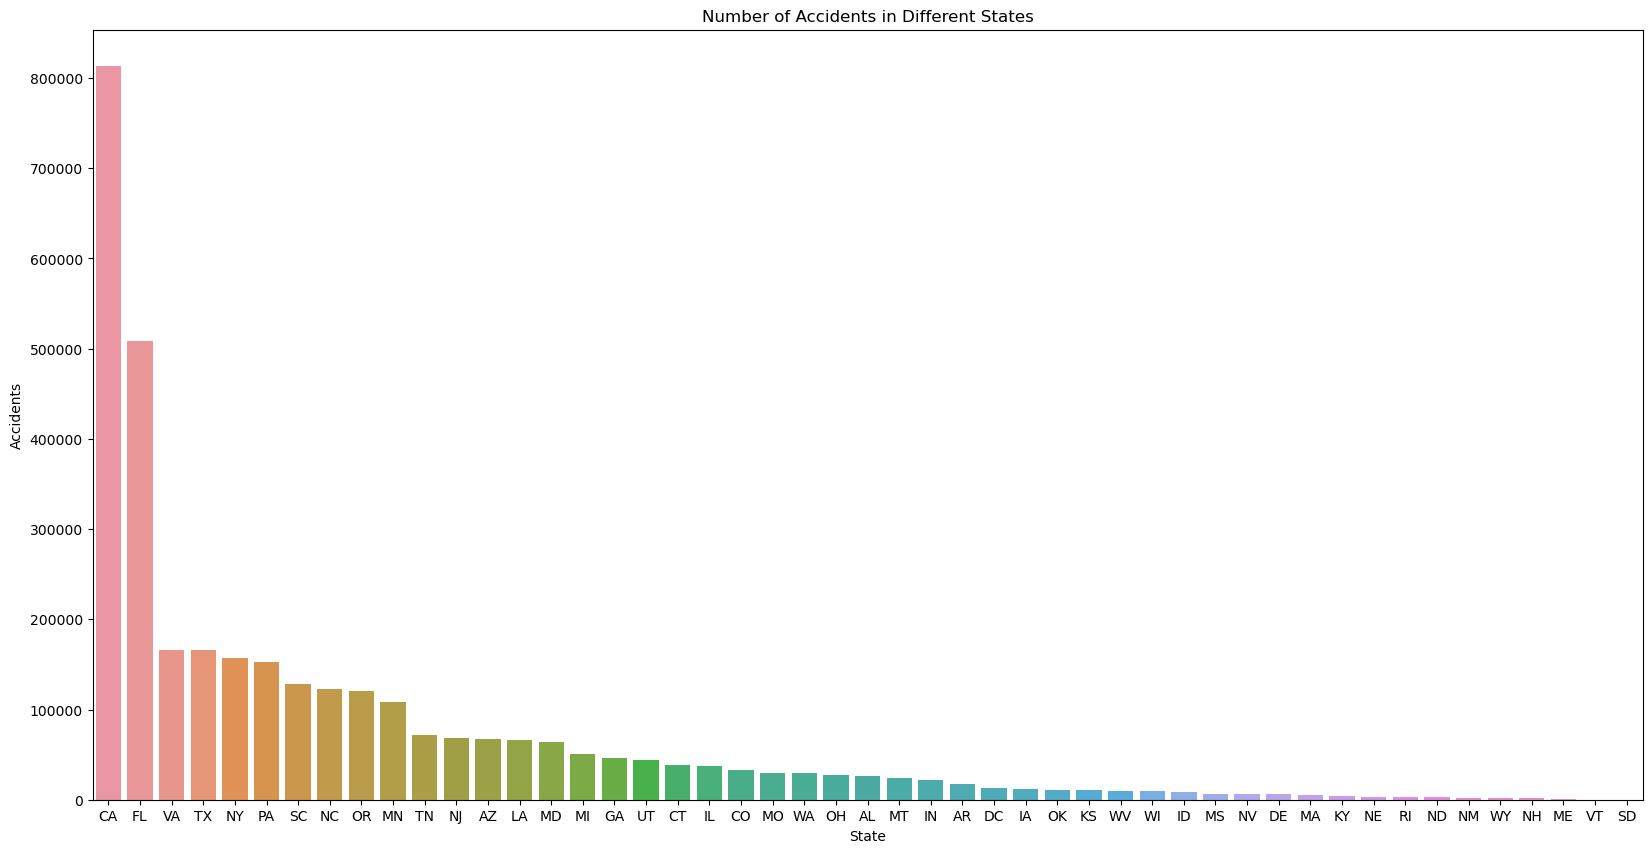

In [11]:

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=df3.index, y=df3)
plt.ylabel('Accidents')
plt.title("Number of Accidents in Different States")

plt.show()

# CA, FL, TX, SC, NY are top five states with the highest accident number. 

In [12]:
# how many accidents in cities
df5 = df.groupby(['City'])['City'].count().sort_values(ascending=False)
#select top 10 
df_first_20 = df5.iloc[:20]

#visualise how many accidents in cities
#select top 10 
#df6 = df5.iloc[:10]
#df6.plot(kind='bar',color='red')
#plt.ylabel('Accidents')
#plt.title("Number of of accidents in different cities")
#plt.show()


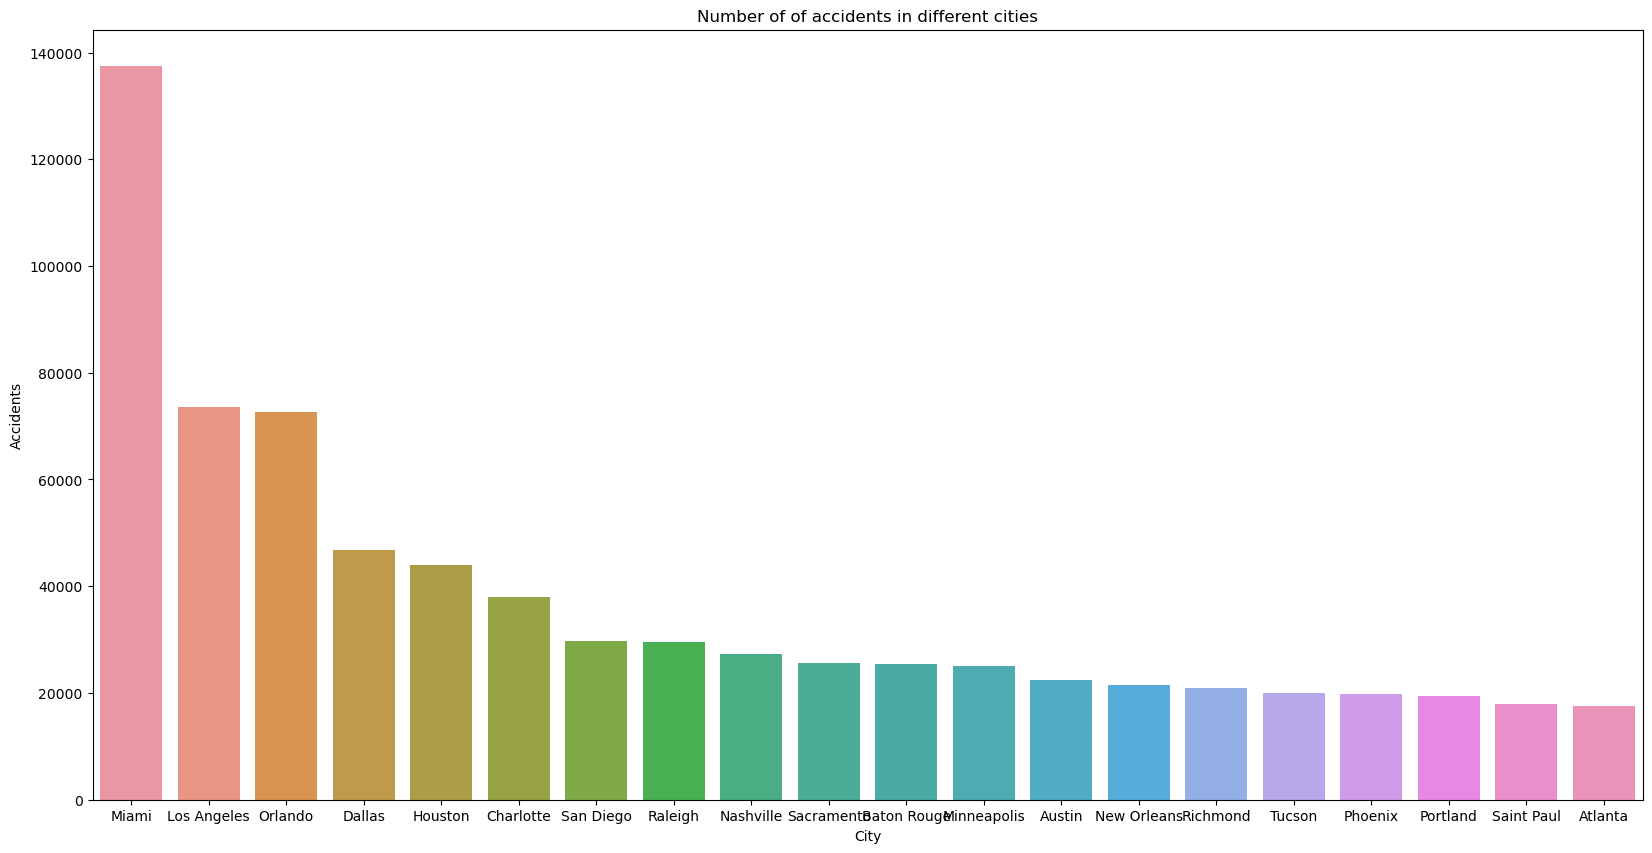

In [13]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x=df_first_20.index, y=df_first_20)
plt.ylabel('Accidents')
plt.title("Number of of accidents in different cities")

plt.show()

Year
2016       3652
2017       7754
2018       9549
2019     198640
2020     649322
2021    1035468
2022    1421077
Name: Year, dtype: int64


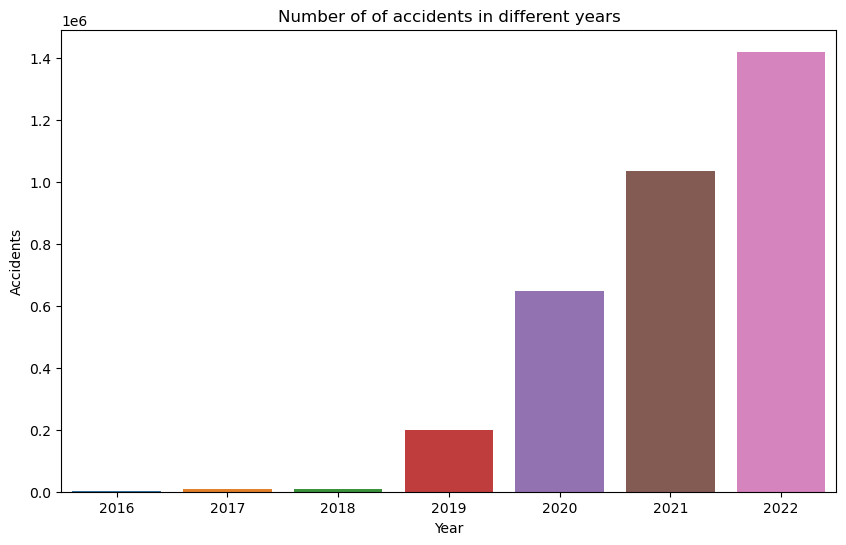

Year
2016        NaN
2017     112.32
2018      23.15
2019    1980.22
2020     226.88
2021      59.47
2022      37.24
Name: Year, dtype: float64


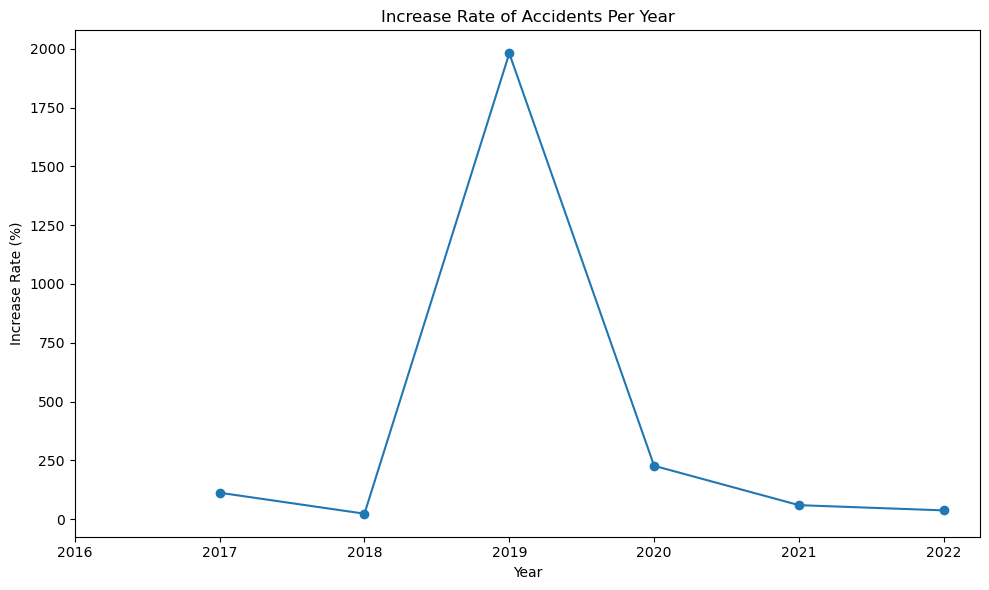

In [14]:
# transform data type 
# df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# how many accidents in different years
df['Year'] = df['Start_Time'].dt.year  
df7 = df.groupby(['Year'])['Year'].count().sort_values(ascending=True)
print(df7)

#visualise how many accidents in years
#select top 10 in df7
#df8=df7.iloc[:10]
#df8.plot(kind='bar',color='red')
#plt.ylabel('Accidents')
#plt.title("Number of of accidents in different years")
#plt.show()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df7.index, y=df7)
plt.ylabel('Accidents')
plt.title("Number of of accidents in different years")
plt.show()



# Calculate the increase rate for each year
df_increase_rate = df7.pct_change() * 100
# Round increase rate values to two decimal places
df_increase_rate = df_increase_rate.round(2)
print(df_increase_rate)

# Visualize increase rate by line chart
plt.figure(figsize=(10, 6))
plt.plot(df_increase_rate.index, df_increase_rate.values, marker='o')
plt.title('Increase Rate of Accidents Per Year')
plt.xlabel('Year')
plt.ylabel('Increase Rate (%)')
plt.grid(False)
plt.xticks(df_increase_rate.index)
plt.tight_layout()
plt.show()




In [15]:
# Use funtion to automate caulating variation by year and visualisation 
def plot_state_variation(data, year1, year2):
    # Filter data for specific years
    df_year1 = data[data['Year'] == year1]
    df_year2 = data[data['Year'] == year2]

    # Group and count for the given years
    df_year1_state = df_year1.groupby('State')['ID'].count().reset_index(name=f'Count-{year1}')
    df_year2_state = df_year2.groupby('State')['ID'].count().reset_index(name=f'Count-{year2}')

    # Merge dataframes
    new_df_both = pd.merge(df_year2_state, df_year1_state, on='State', how='inner')

    # Calculate variation
    new_df_both['Variation'] = new_df_both[f'Count-{year2}'] - new_df_both[f'Count-{year1}']

    # Sort by variation
    new_df_both = new_df_both.sort_values(by='Variation', ascending=False)

    # Set the style of the plot
    # sns.set(style="whitegrid")

    # Create a bar plot using Seaborn
    plt.figure(figsize=(20, 10))  
    sns.barplot(x='State', y='Variation', data=new_df_both)

    # Add labels and title
    plt.xlabel('State')
    plt.ylabel('Variation')
    plt.title(f'Variation by State from {year1} to {year2}')

    # Display the plot
    plt.show()



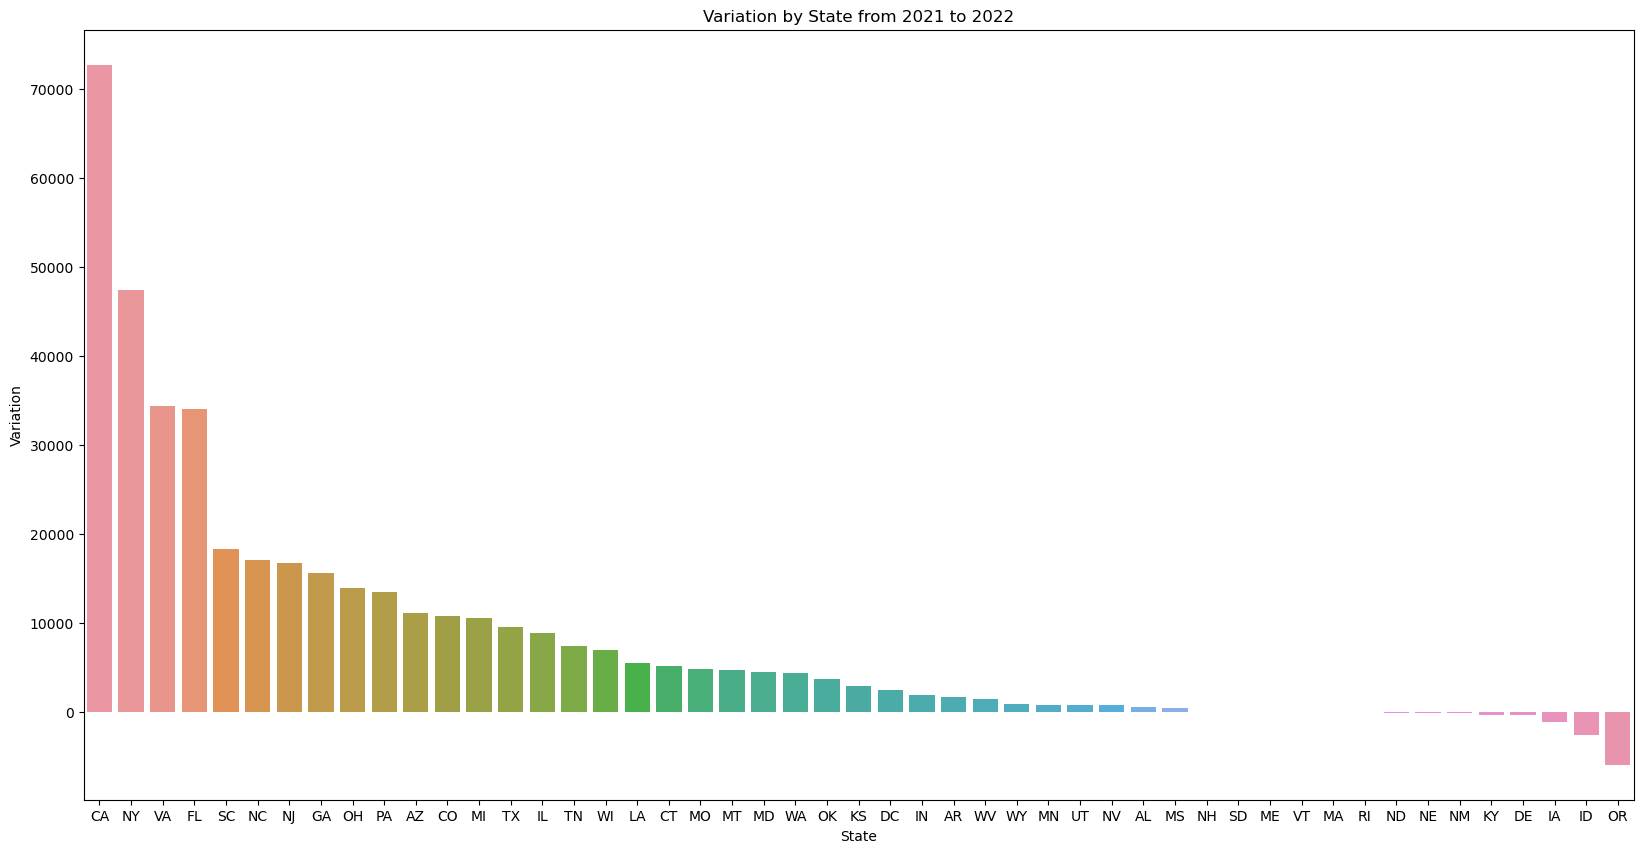

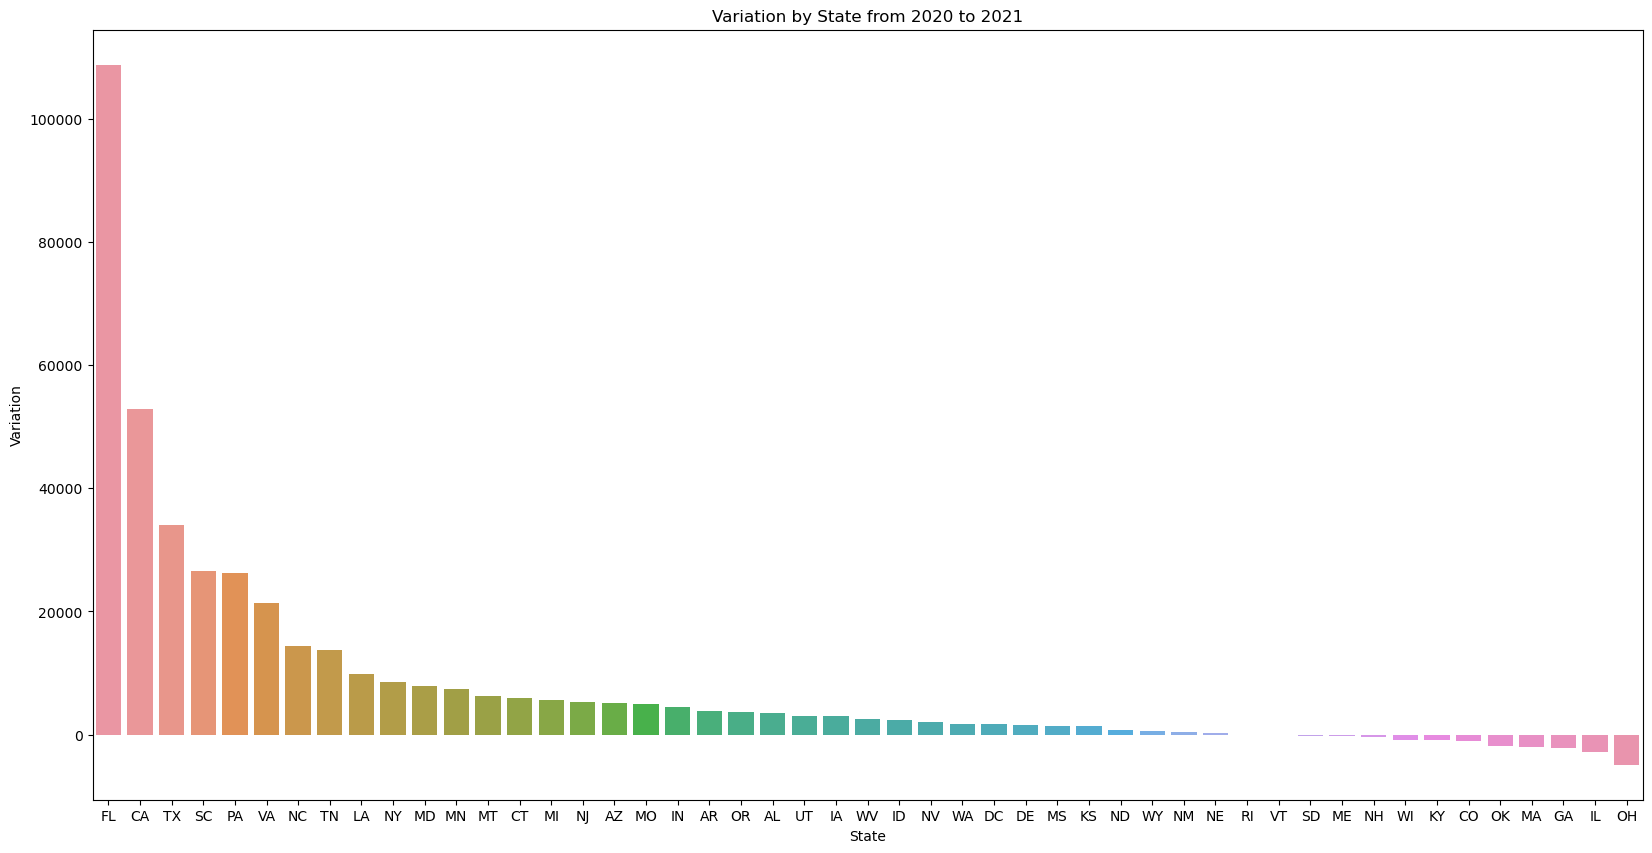

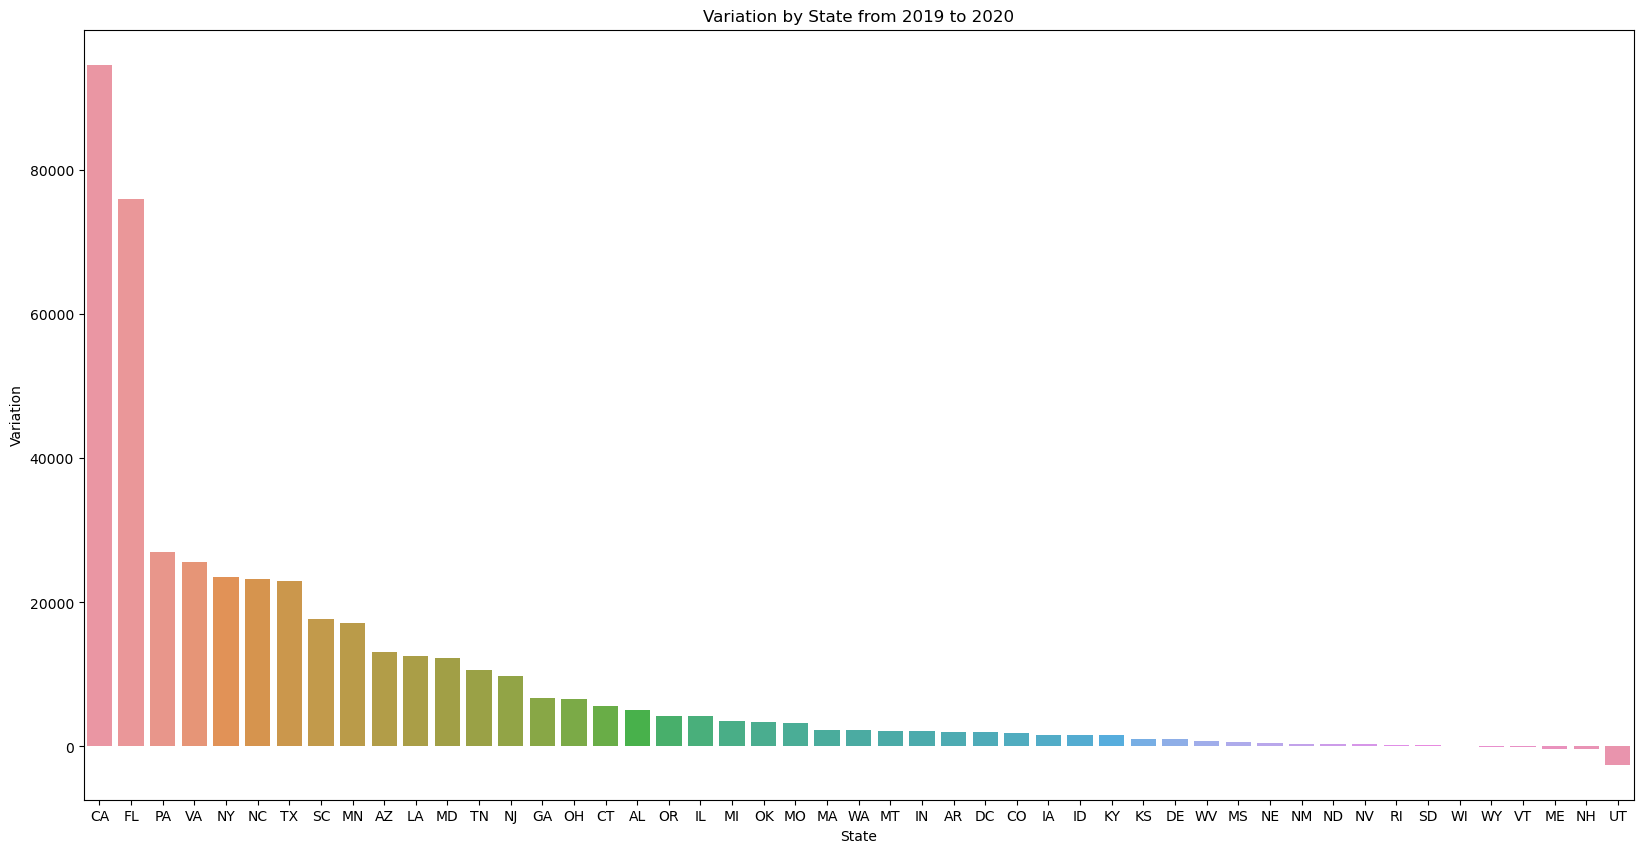

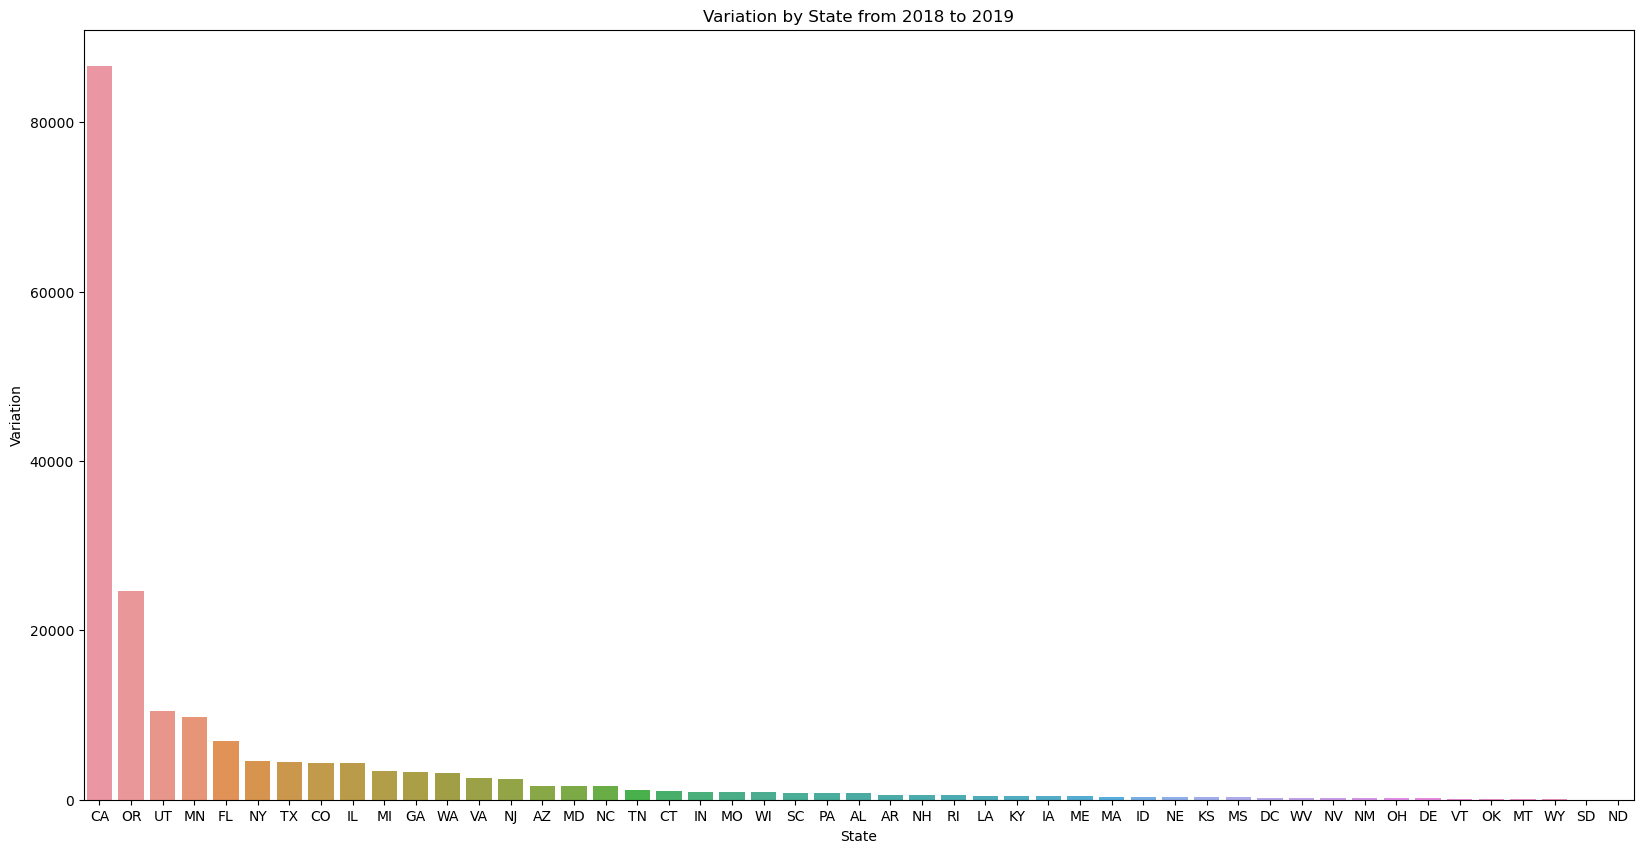

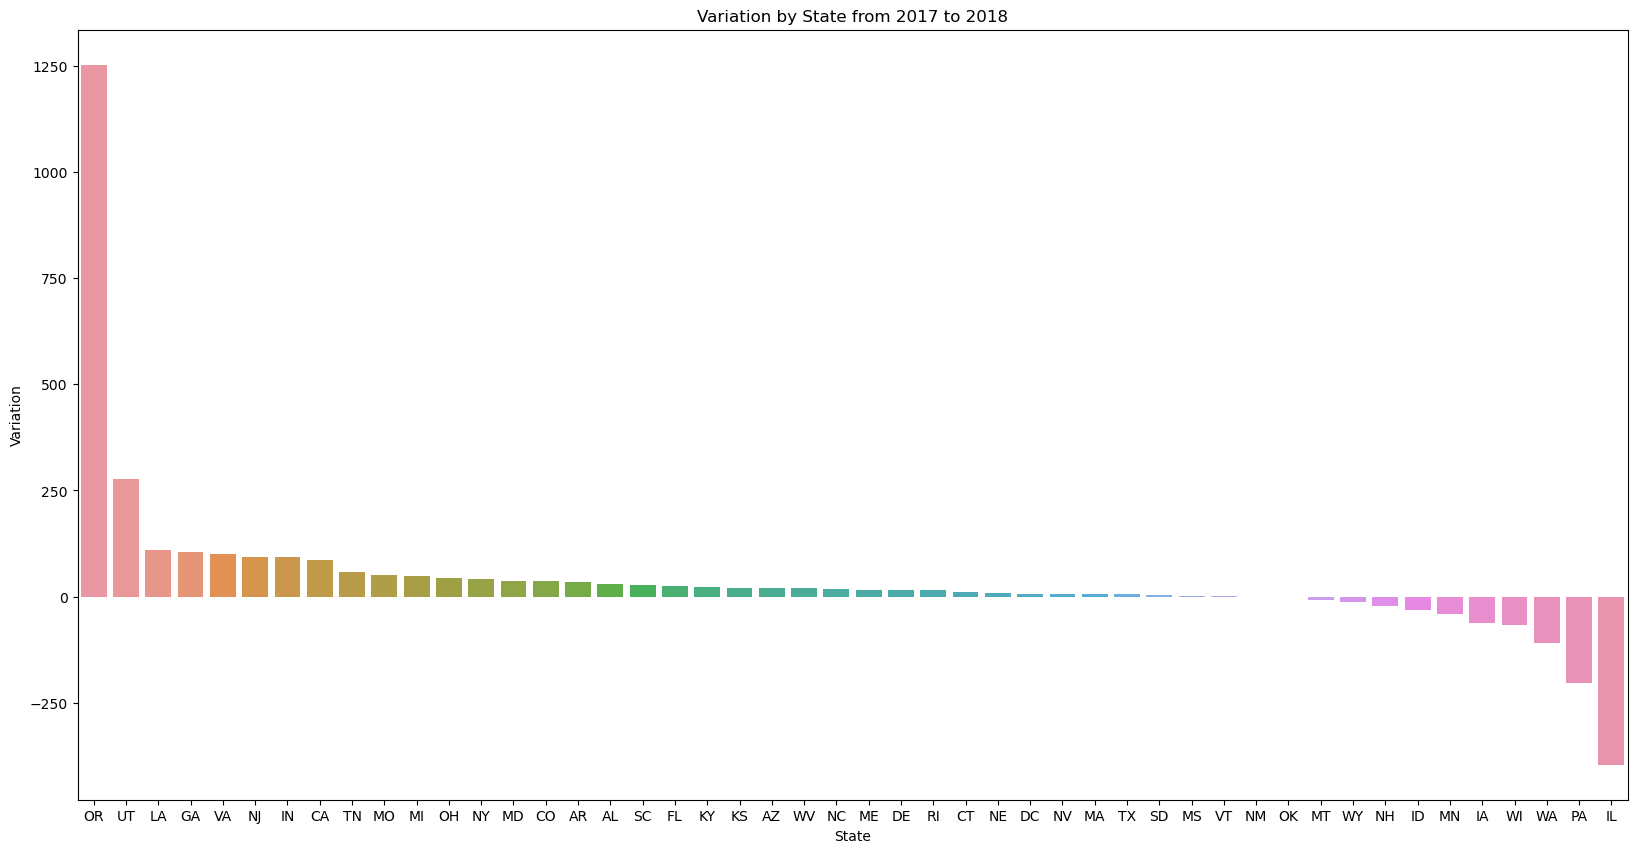

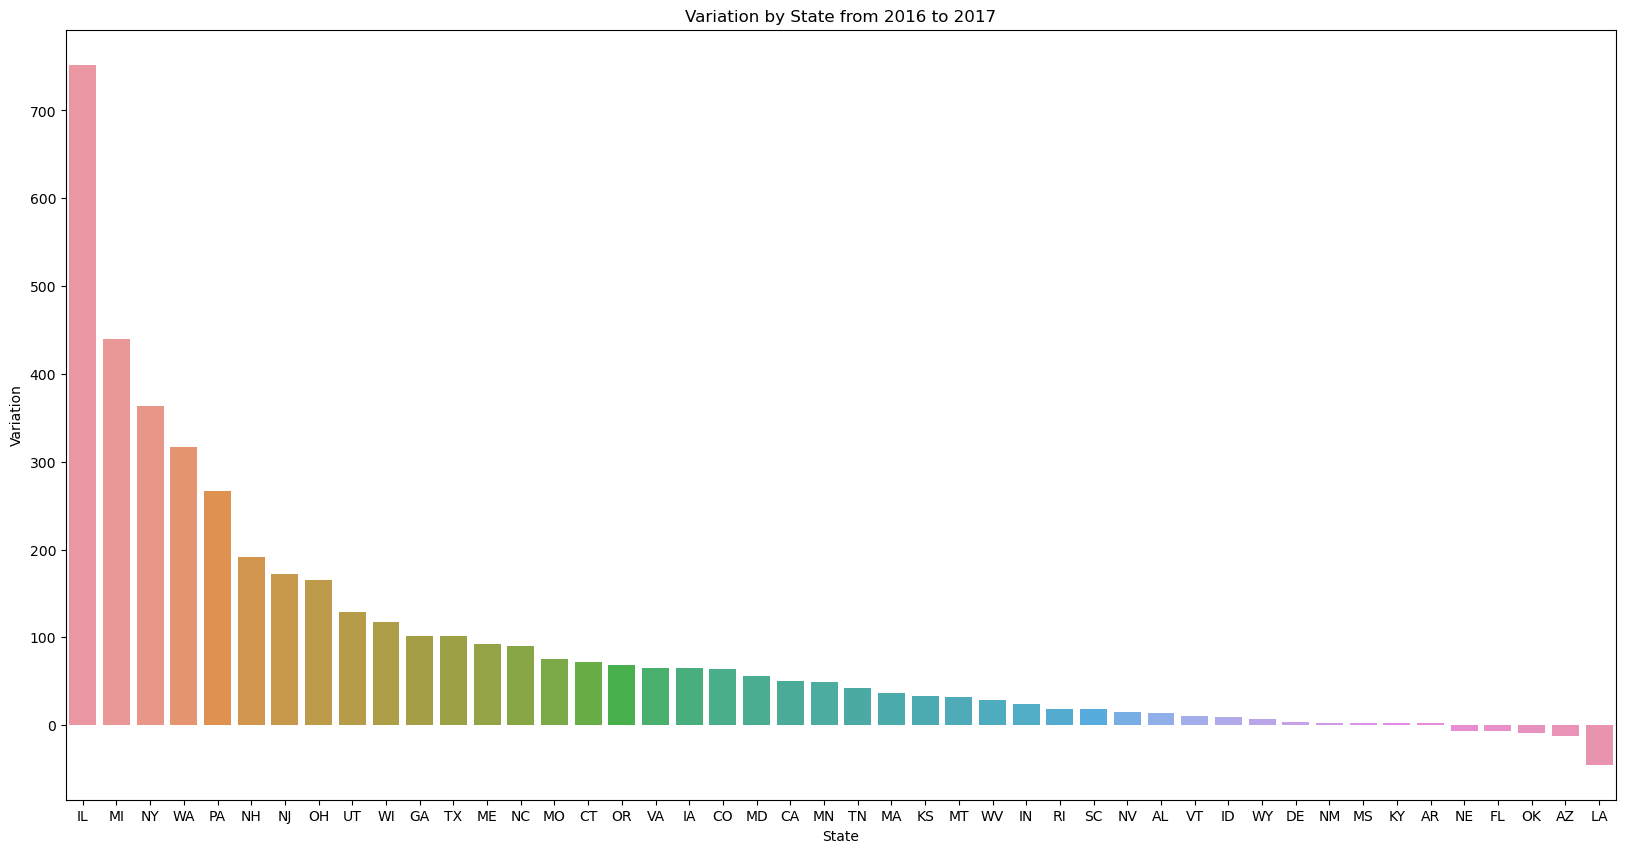

In [16]:
plot_state_variation(df, 2021, 2022)
plot_state_variation(df, 2020, 2021)
plot_state_variation(df, 2019, 2020)
plot_state_variation(df, 2018, 2019)
plot_state_variation(df, 2017, 2018)
plot_state_variation(df, 2016, 2017)

# The increase rate of accidents in 2022 is 12.71%, what are states that contribute to this growth? 
# Top five states are NA,CA,FL,NJ,GA. In order to slow down the yearly increase of accidents, the government should put their focus on reducing accident numbers of these states.
# The increase rate of accidents in 2021 is 32.64%, what are states that contribute to this growth? 
# Top five states are FL,CA,TX,PA,VA. In order to slow down the yearly increase of accidents, the government should put their focus on reducing accident numbers of these states.

In [17]:
# how many accidents in different months
df['Month'] = df['Start_Time'].dt.month 
df9 = df.groupby(['Month'])['Month'].count().sort_values(ascending=False)
print(df9)

Month
12    478254
11    370563
10    287306
9     281952
4     277005
2     268001
6     254581
5     253036
1     246514
8     212778
3     201442
7     194030
Name: Month, dtype: int64


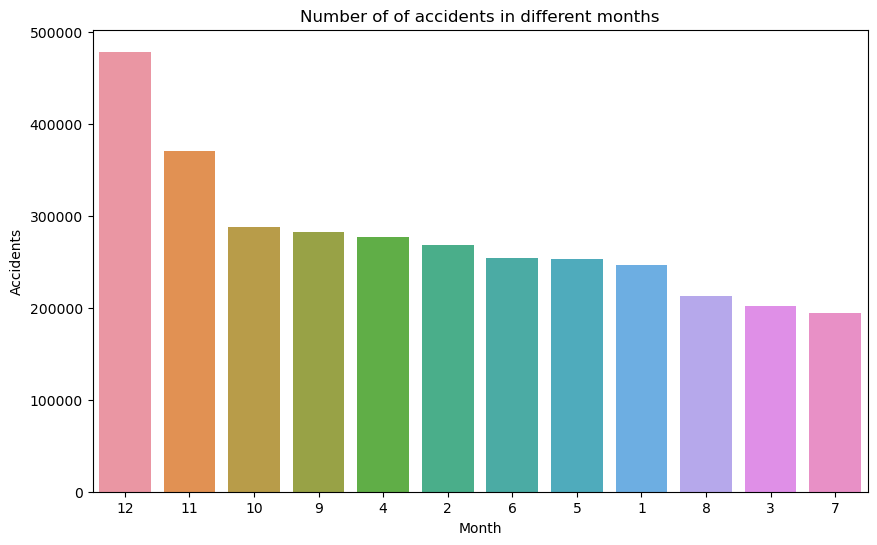

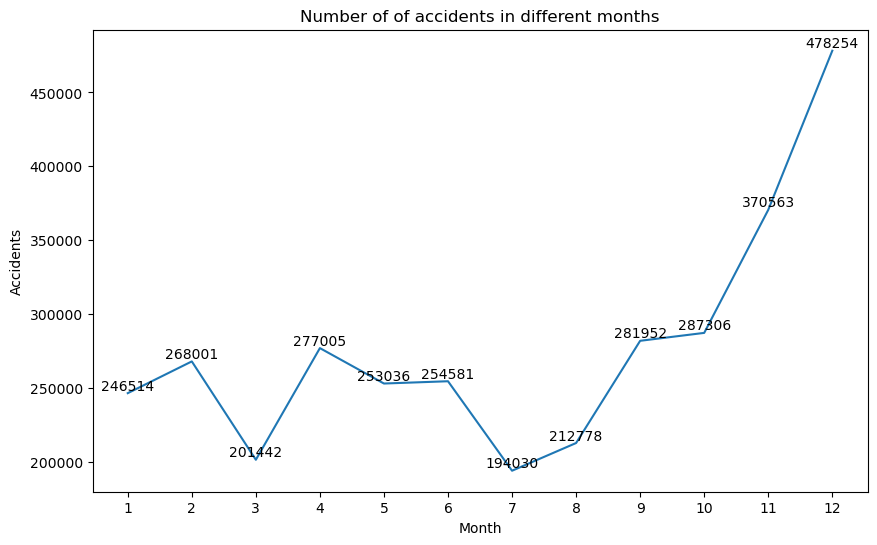

In [18]:
plt.figure(figsize=(10, 6))
# Use order to sort df9.index in sns.barplot
ax = sns.barplot(x=df9.index, y=df9.values, order=df9.index)
plt.ylabel('Accidents')
plt.title("Number of of accidents in different months")
plt.show()

plt.figure(figsize=(10, 6))
# Use order to sort df9.index in sns.barplot
ax = sns.lineplot(x=df9.index, y=df9.values)
plt.ylabel('Accidents')
plt.title("Number of of accidents in different months")
# Set x-axis ticks to show all months
plt.xticks(df9.index)  

# Show data points with exact values
for x, y in zip(df9.index, df9.values):
    ax.text(x, y, str(y), ha='center', va='bottom')
plt.show()

# December,November and October have relatively large numbers of accidents.
# April,June and May have relatively small numbers of accidents.

In [19]:
# how many accidents in different weekdays
df['Weekday'] = df['Start_Time'].dt.weekday 
df11 = df.groupby(['Weekday'])['Weekday'].count().sort_values(ascending=False)
print(df11)

Weekday
4    575851
3    538045
2    522457
1    501761
0    467740
5    402032
6    317576
Name: Weekday, dtype: int64


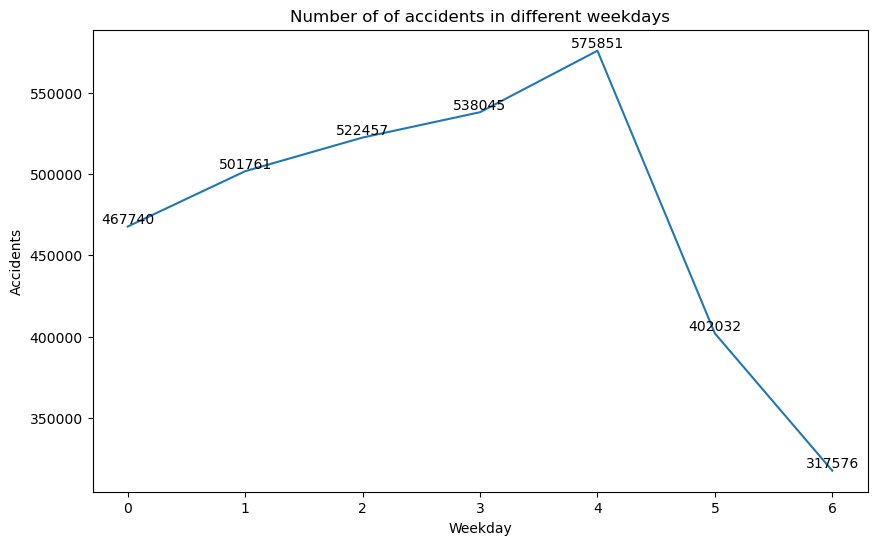

In [20]:
#notice: Monday=0, Sunday=6 in pandas 
plt.figure(figsize=(10, 6))
# Use order to sort df11.index in sns.barplot
ax = sns.lineplot(x=df11.index, y=df11.values)
plt.ylabel('Accidents')
plt.title("Number of of accidents in different weekdays")
# Set x-axis ticks to show all weekdays
plt.xticks(df11.index)  

# Show data points with exact values
for x, y in zip(df11.index, df11.values):
    ax.text(x, y, str(y), ha='center', va='bottom')
plt.show()

# Weekdays has accident numbers that are twice as high as those during the weekend.

In [21]:
# how many accidents in different hours
df['Hours'] = df['Start_Time'].dt.hour 
df13 = df.groupby(['Hours'])['Hours'].count()
print(df13)


Hours
0      77627
1      66851
2      62070
3      53328
4      55203
5      85922
6     127088
7     161120
8     146060
9     120362
10    120409
11    135976
12    167683
13    197729
14    234150
15    265247
16    267089
17    259312
18    188419
19    132615
20    111963
21    106615
22     96779
23     85845
Name: Hours, dtype: int64


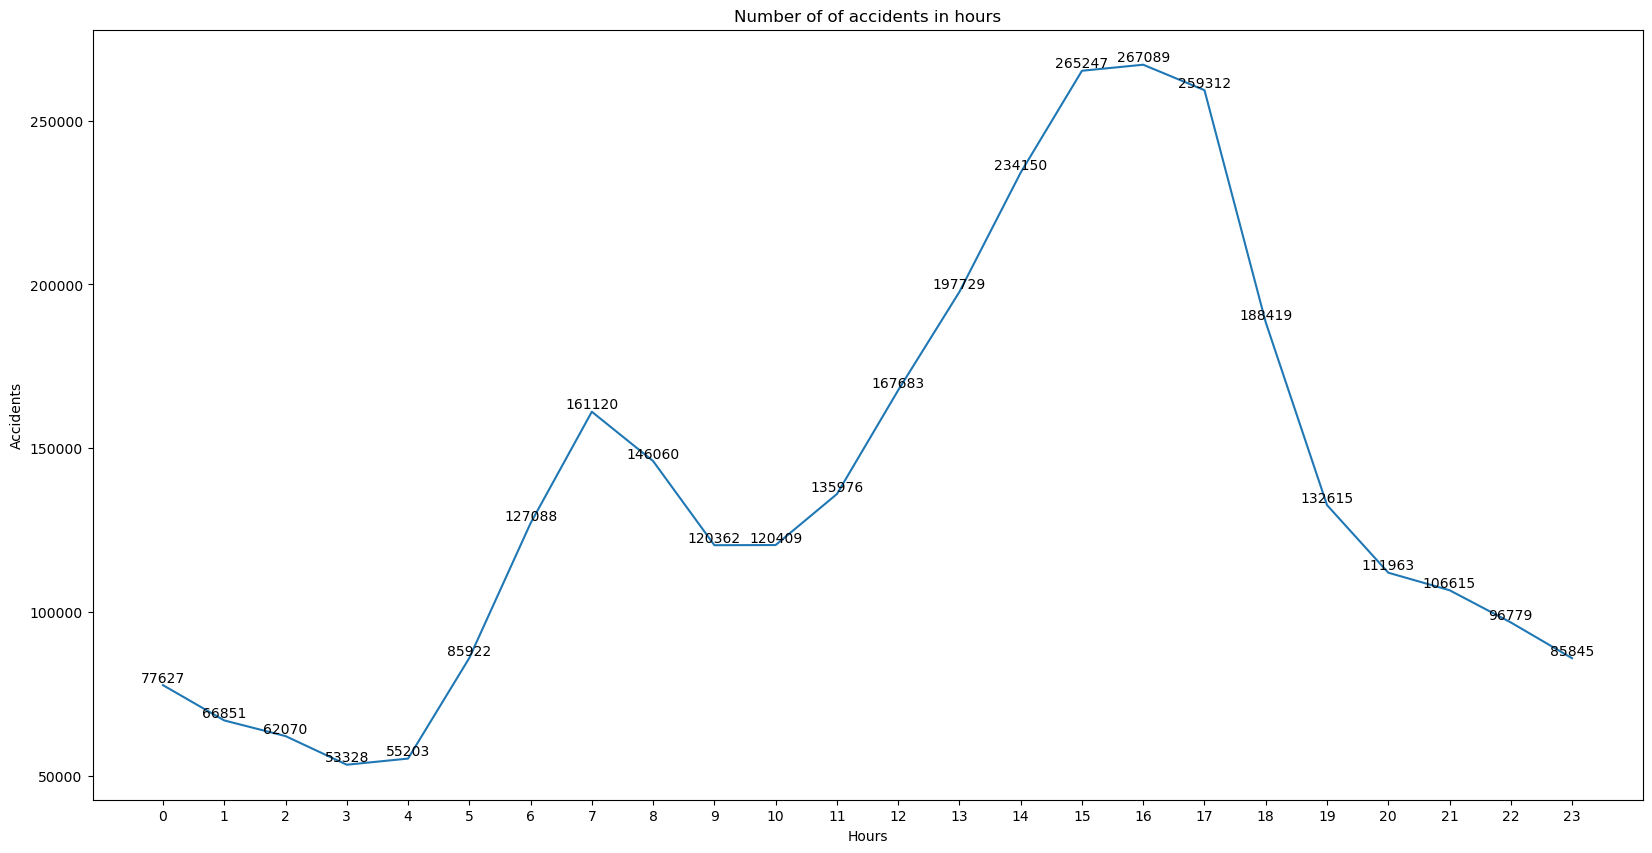

In [22]:
plt.figure(figsize=(20, 10))
# Use order to sort df13.index in sns.barplot
ax = sns.lineplot(x=df13.index, y=df13.values)
plt.ylabel('Accidents')
plt.title("Number of of accidents in hours")
# Set x-axis ticks to show all weekdays
plt.xticks(df13.index)  
# Show data points with exact values
for x, y in zip(df13.index, df13.values):
    ax.text(x, y, str(y), ha='center', va='bottom')
plt.show()

# 4:00 PM and 5:00 PM have the highest accidents.
# Accident counts are high at 7:00 AM and 8:00 AM, possibly due to Morning Commute.
# Accidents remain relatively steady from 9:00 AM to 1:00 PM, which maintains a medium level.
# Accidents decrease after 6:00 PM, and this trend has been continued during the evening and night.
# 4:00 AM has high accident counts, it is possible that people start to commute.
# Fewer accidents occur at midnight and early morning.

Weather_Condition
Fair                       1605252
Cloudy                      479052
Mostly Cloudy               432682
Partly Cloudy               298874
Light Rain                  148575
Light Snow                   66861
Fog                          49567
Rain                         34016
Haze                         33114
Fair / Windy                 23508
Heavy Rain                   13791
Thunder in the Vicinity      11897
Mostly Cloudy / Windy        10356
Cloudy / Windy               10089
T-Storm                       9887
Name: Weather_Condition, dtype: int64


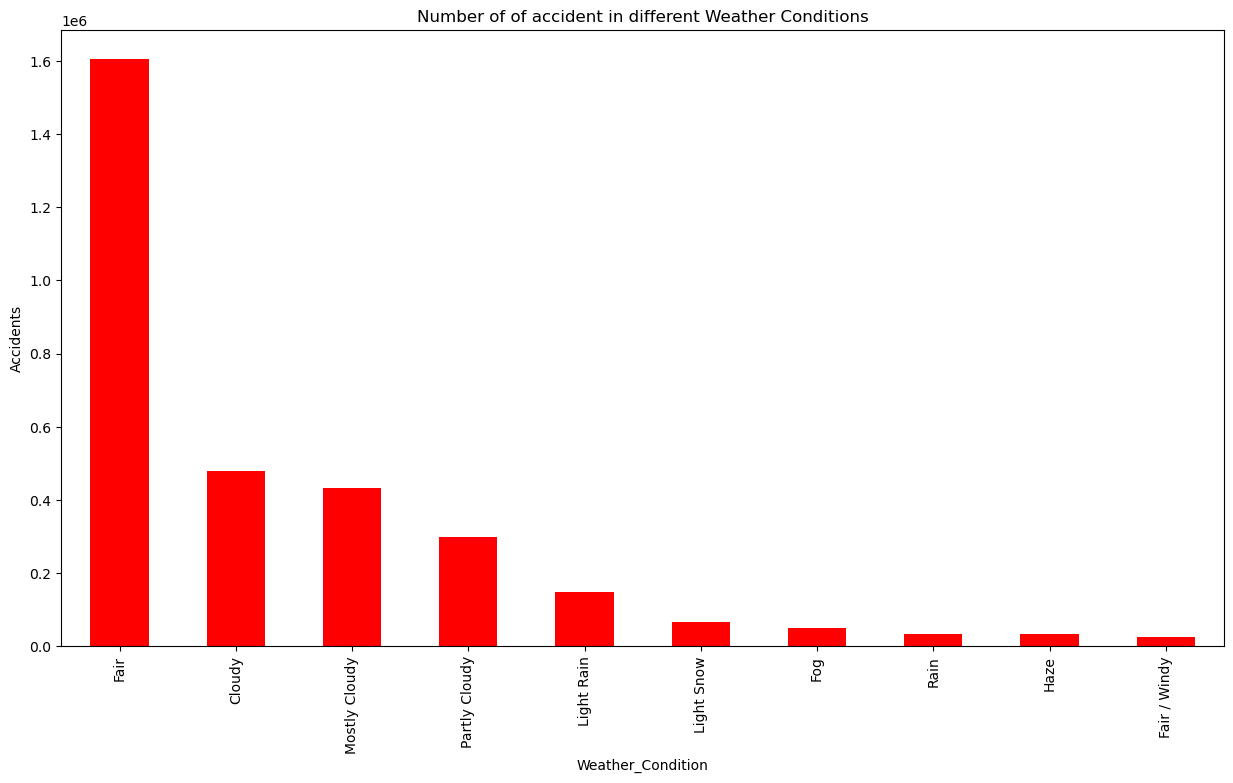

In [23]:
# how many accidents in different Weather_Condition
df15 = df.groupby(['Weather_Condition'])['Weather_Condition'].count().sort_values(ascending=False)
print(df15.head(15))
#visualise how many accidents in Weather_Condition
#select top 24 in df13
df16=df15.iloc[:10]
plt.figure(figsize=(15, 8))
df16.plot(kind='bar',color='red')
plt.ylabel('Accidents')
plt.title("Number of of accident in different Weather Conditions")
plt.show()

# Clear and fair conditions result in the highest accidents.
# Cloudy weather contributes significantly, accounting for around 1.35 million accidents.
# Rain-related conditions cause about 100000 accidents.
# Adverse Conditions (Snow, fog, haze) cause roughly 200000 accidents.

Severity
2    3125707
4     106162
3      68026
1      25567
Name: Severity, dtype: int64


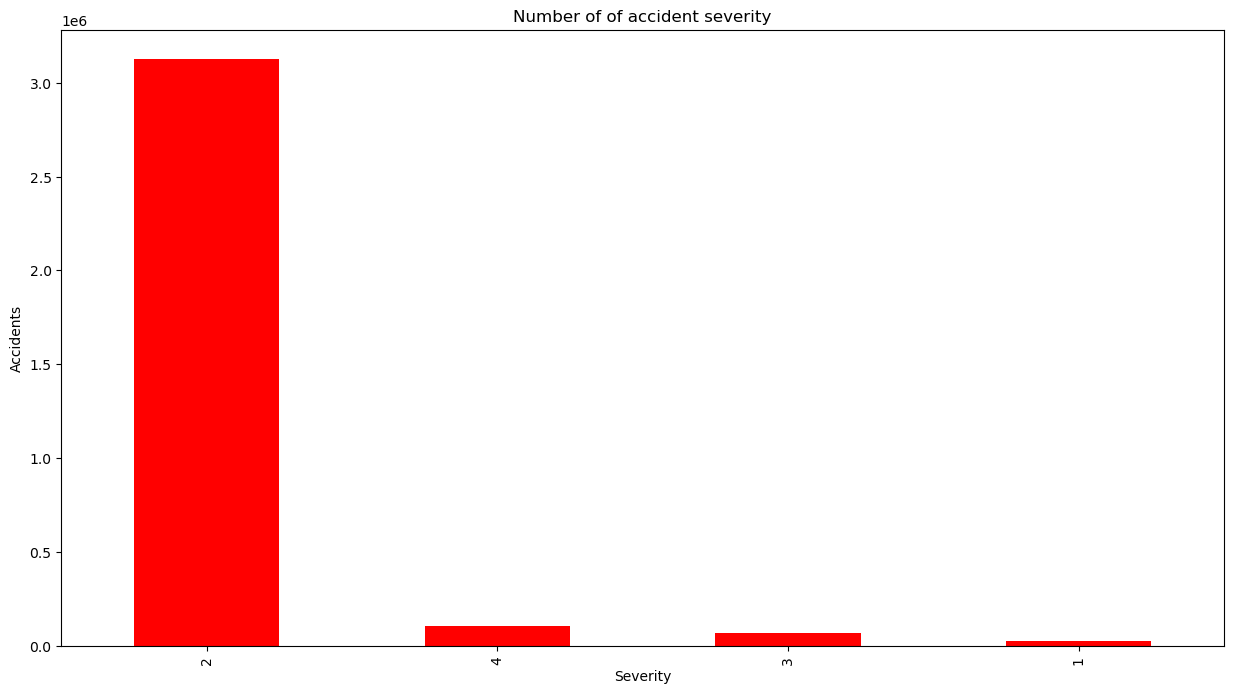

In [24]:
# how many accidents in different Severity
df17 = df.groupby(['Severity'])['Severity'].count().sort_values(ascending=False)
print(df17)
#visualise how many accidents in Severity
#select top 24 in df13
df18=df17.iloc[:10]
plt.figure(figsize=(15, 8))
df17.plot(kind='bar',color='red')
plt.ylabel('Accidents')
plt.title("Number of of accident severity")
plt.show()

# Severity 2 accidents are the most common.
# Severity 3 accidents are the second Largest common.

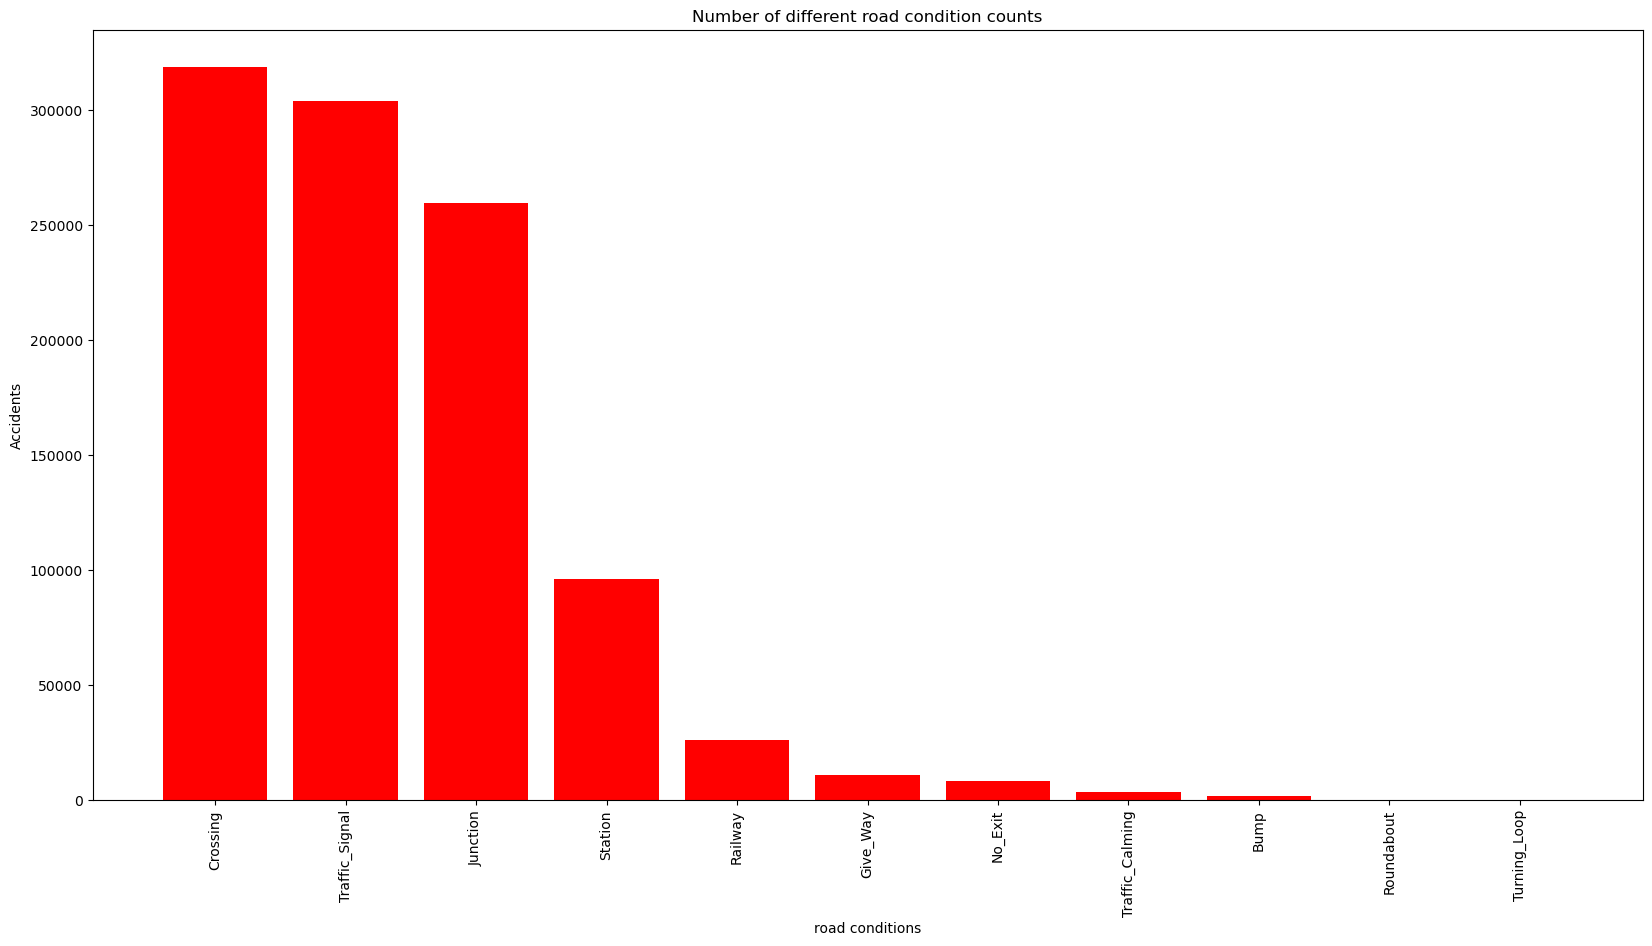

In [25]:
#Comparison of different road conditons counts

# Count the number of 'true' values in each column
columns = ['Crossing', 'Bump', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
           'Station', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']
true_counts = []
for column in columns:
    true_count = df[column].value_counts().get(True, 0)
    true_counts.append(true_count)

    # Sort the counts in descending order
sorted_counts = sorted(true_counts, reverse=True)
sorted_columns = [column for _, column in sorted(zip(true_counts, columns), reverse=True)]

# Create a bar chart
plt.figure(figsize=(20, 10))
plt.bar(sorted_columns, sorted_counts,color='red')
plt.xlabel('road conditions')
plt.ylabel('Accidents')
plt.title("Number of different road condition counts")
plt.xticks(rotation=90)
plt.show()

# Common road accident features of traffic accidents are Traffic_Signal, crossing, junction,station and railway.

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


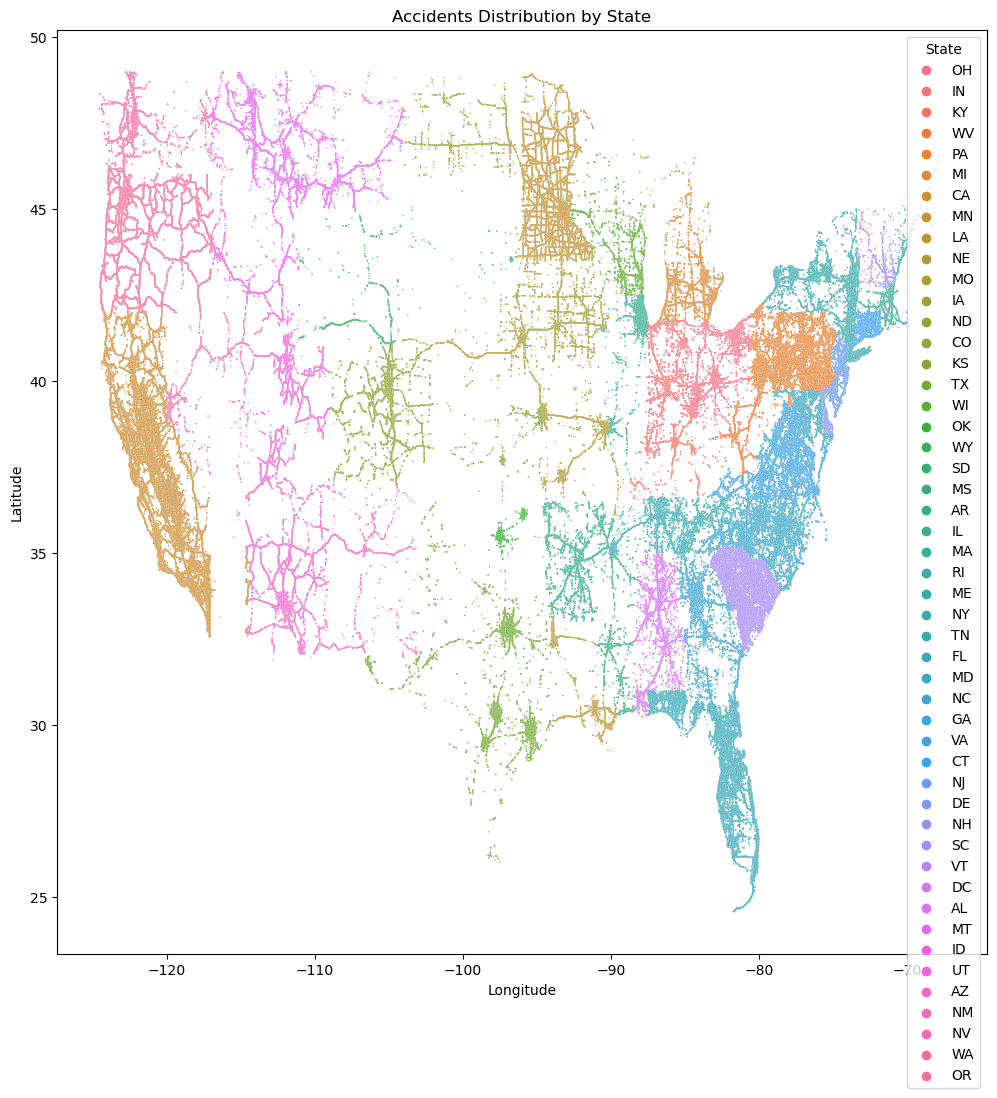

In [26]:
# Create a location scatter plot using Seaborn
plt.figure(figsize=(12, 12))
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat, hue=df.State, s=1)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accidents Distribution by State')

# Add a legend
plt.legend(title='State')

plt.show()

# This diagram shows the western and eastern and southeast coasts, as well as regions close to the five lakes, experience a significantly higher number of accidents.

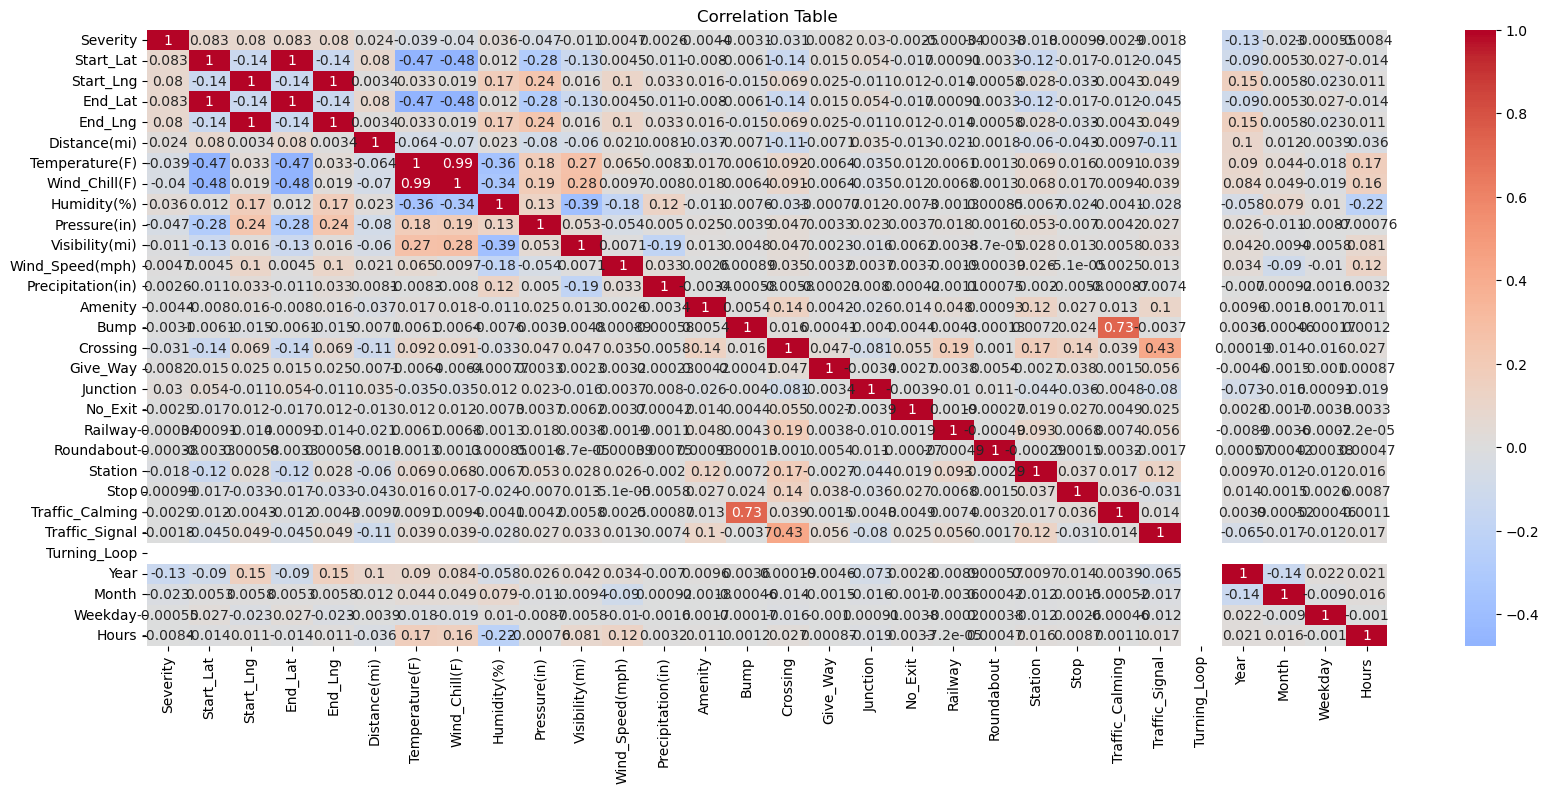

In [27]:
# Set the size
plt.figure(figsize=(20,8))  
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Table')
plt.show()

# Temperature and Wind_Chill have a very strong positive correlation.
# Traffic_Signal, Junction and Crossing seem to have a negative correlation with severity.
